In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
try:
    df = pd.read_csv('crcCASc.csv')
    print("Dataset loaded successfully!")
    print("First 5 rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print("Error: 'crcCASc.csv' not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately if the file isn't found
    exit()

Dataset loaded successfully!
First 5 rows:
            STATE/UT     CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  \
0     ANDHRA PRADESH  MURDER OF SCs    45    60    33    39    37    52    46   
1  ARUNACHAL PRADESH  MURDER OF SCs     0     0     0     0     1     0     0   
2              ASSAM  MURDER OF SCs     0     3     8     0    21     5    11   
3              BIHAR  MURDER OF SCs    28    33     9    14    12    16    26   
4       CHHATTISGARH  MURDER OF SCs     8    11    12    25     6    10    11   

   2008  2009  2010  2011  2012  
0    48    35    43    64    54  
1     0     0     0     0     0  
2     9     0     0     0     0  
3    46    22    24    29    27  
4     7    11     8     2     6  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATE/UT    418 non-null    object
 1   CRIME HEAD  418 non-n

In [4]:
year_columns = [col for col in df.columns if col.isdigit() and len(col) == 4]
print(f"\nIdentified year columns: {year_columns}")


Identified year columns: ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']


In [5]:
for col in year_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df_long = df.melt(
    id_vars=['STATE/UT', 'CRIME HEAD'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)

In [7]:
df_long['Year'] = df_long['Year'].astype(int)

In [9]:
df_long.dropna(subset=['Value'], inplace=True)
df_long['Value'] = df_long['Value'].astype(int)


In [10]:
print("\nLong format DataFrame (first 5 rows):")
print(df_long.head())
print("\nLong format DataFrame Info:")
df_long.info()


Long format DataFrame (first 5 rows):
            STATE/UT     CRIME HEAD  Year  Value
0     ANDHRA PRADESH  MURDER OF SCs  2001     45
1  ARUNACHAL PRADESH  MURDER OF SCs  2001      0
2              ASSAM  MURDER OF SCs  2001      0
3              BIHAR  MURDER OF SCs  2001     28
4       CHHATTISGARH  MURDER OF SCs  2001      8

Long format DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATE/UT    5016 non-null   object
 1   CRIME HEAD  5016 non-null   object
 2   Year        5016 non-null   int64 
 3   Value       5016 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.9+ KB


In [11]:
all_india_total_crimes = df_long[
    (df_long['STATE/UT'] == 'TOTAL (ALL-INDIA)') &
    (df_long['CRIME HEAD'] == 'TOTAL CRIMES AGAINST SCs')
].sort_values(by='Year')

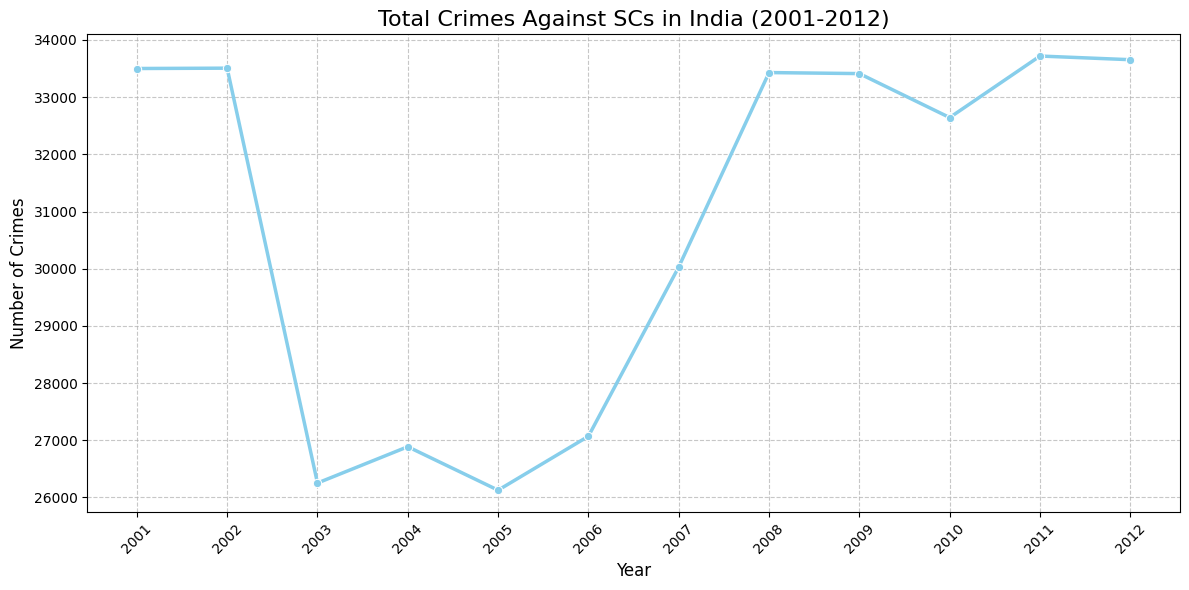

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_india_total_crimes, x='Year', y='Value', marker='o', color='skyblue', linewidth=2.5)
plt.title('Total Crimes Against SCs in India (2001-2012)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(all_india_total_crimes['Year'], rotation=45) # Show all years on x-axis
plt.tight_layout()
plt.show()

In [14]:
states_df = df_long[
    (df_long['CRIME HEAD'] == 'TOTAL CRIMES AGAINST SCs') &
    (~df_long['STATE/UT'].str.contains('TOTAL', na=False)) &
    (~df_long['STATE/UT'].isin(['A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY']))
]

In [15]:
state_total_crimes = states_df.groupby('STATE/UT')['Value'].sum().sort_values(ascending=False)



Top 5 states by total crimes against SCs (2001-2012): ['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'ANDHRA PRADESH', 'BIHAR']


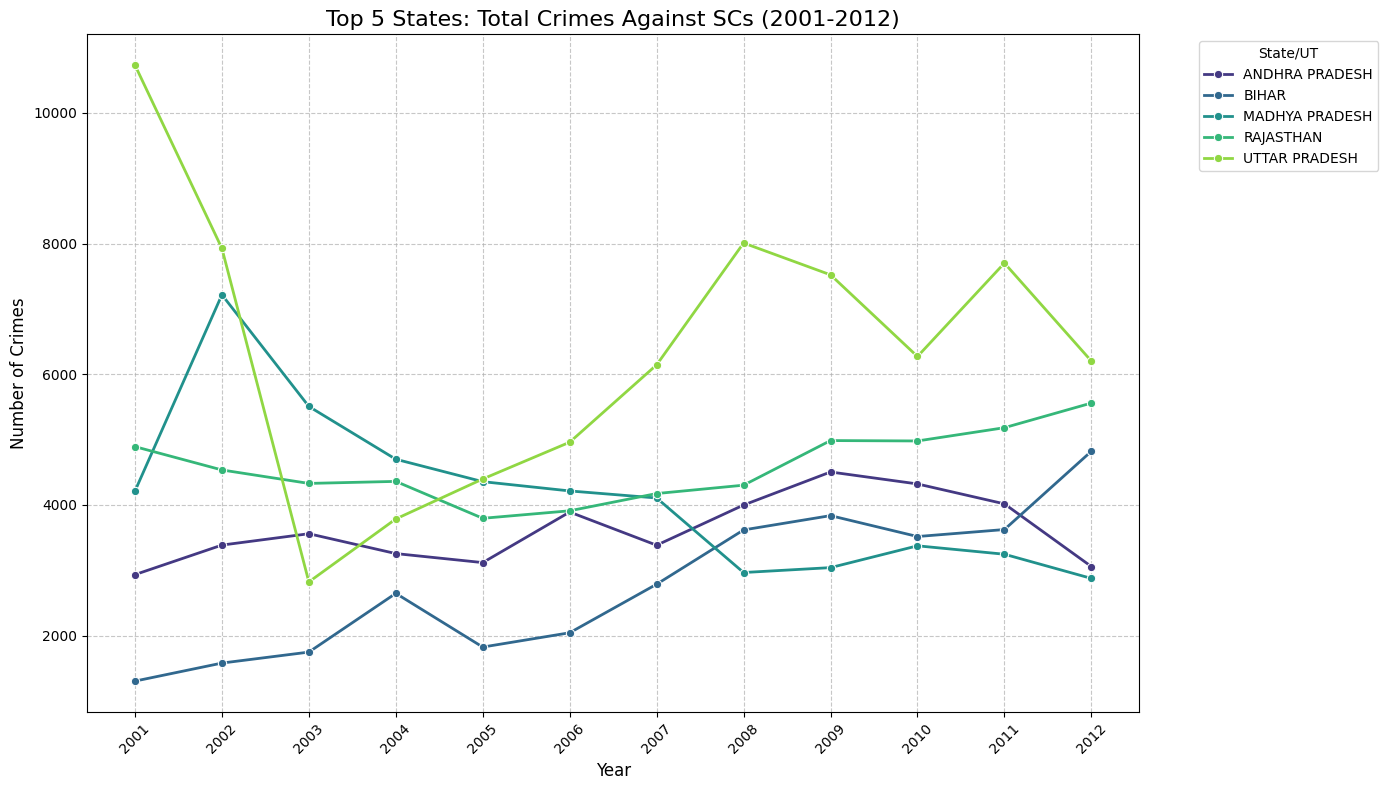

In [16]:
top_5_states = state_total_crimes.head(5).index.tolist()
print(f"\nTop 5 states by total crimes against SCs (2001-2012): {top_5_states}")

top_5_states_data = states_df[states_df['STATE/UT'].isin(top_5_states)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=top_5_states_data, x='Year', y='Value', hue='STATE/UT', marker='o', palette='viridis', linewidth=2)
plt.title('Top 5 States: Total Crimes Against SCs (2001-2012)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(states_df['Year'].unique(), rotation=45)
plt.legend(title='State/UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-2505600195.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crime_type.values, y=avg_crime_type.index, palette='magma')


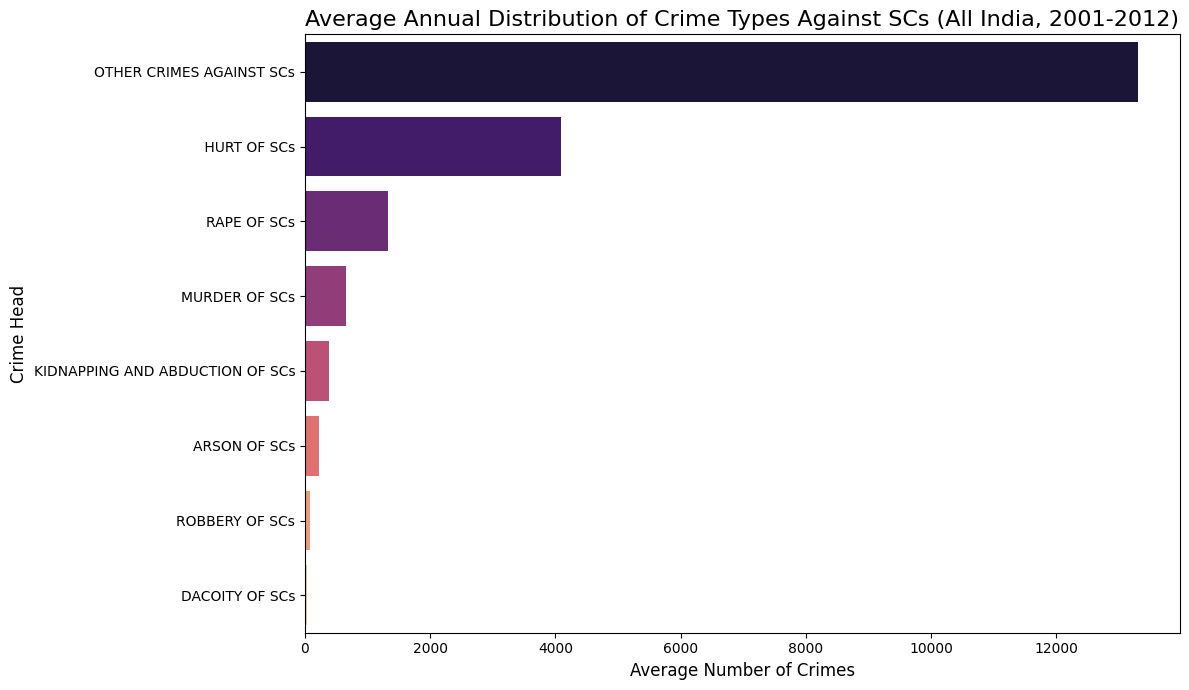

In [17]:
crime_types_df = df_long[
    (df_long['STATE/UT'] == 'TOTAL (ALL-INDIA)') &
    (~df_long['CRIME HEAD'].str.contains('TOTAL CRIMES AGAINST SCs|PROTECTION OF CIVIL RIGHTS ACT FOR SCs|SC/ST \(PREVENTION OF ATROCITIES\) ACT OF SCs', regex=True, na=False))
]

# Calculate the average number of crimes for each type across all years
avg_crime_type = crime_types_df.groupby('CRIME HEAD')['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_crime_type.values, y=avg_crime_type.index, palette='magma')
plt.title('Average Annual Distribution of Crime Types Against SCs (All India, 2001-2012)', fontsize=16)
plt.xlabel('Average Number of Crimes', fontsize=12)
plt.ylabel('Crime Head', fontsize=12)
plt.tight_layout()
plt.show()


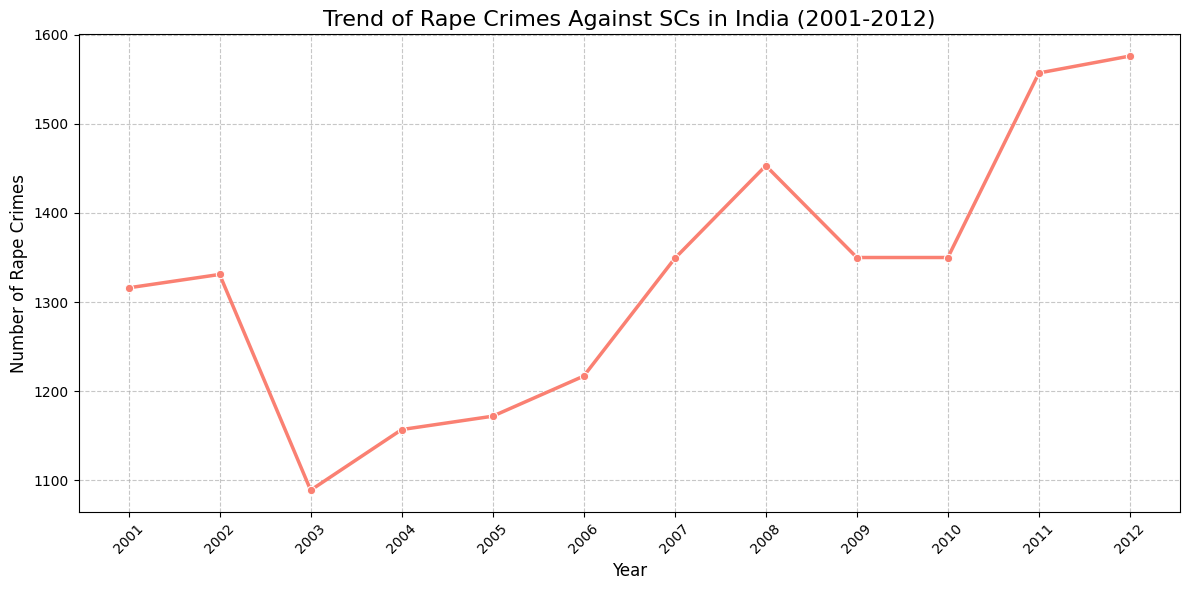

In [18]:
rape_crimes_all_india = df_long[
    (df_long['STATE/UT'] == 'TOTAL (ALL-INDIA)') &
    (df_long['CRIME HEAD'] == 'RAPE OF SCs')
].sort_values(by='Year')

plt.figure(figsize=(12, 6))
sns.lineplot(data=rape_crimes_all_india, x='Year', y='Value', marker='o', color='salmon', linewidth=2.5)
plt.title('Trend of Rape Crimes Against SCs in India (2001-2012)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rape Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rape_crimes_all_india['Year'], rotation=45)
plt.tight_layout()
plt.show()

ValueError: Unknown format code 'd' for object of type 'float'

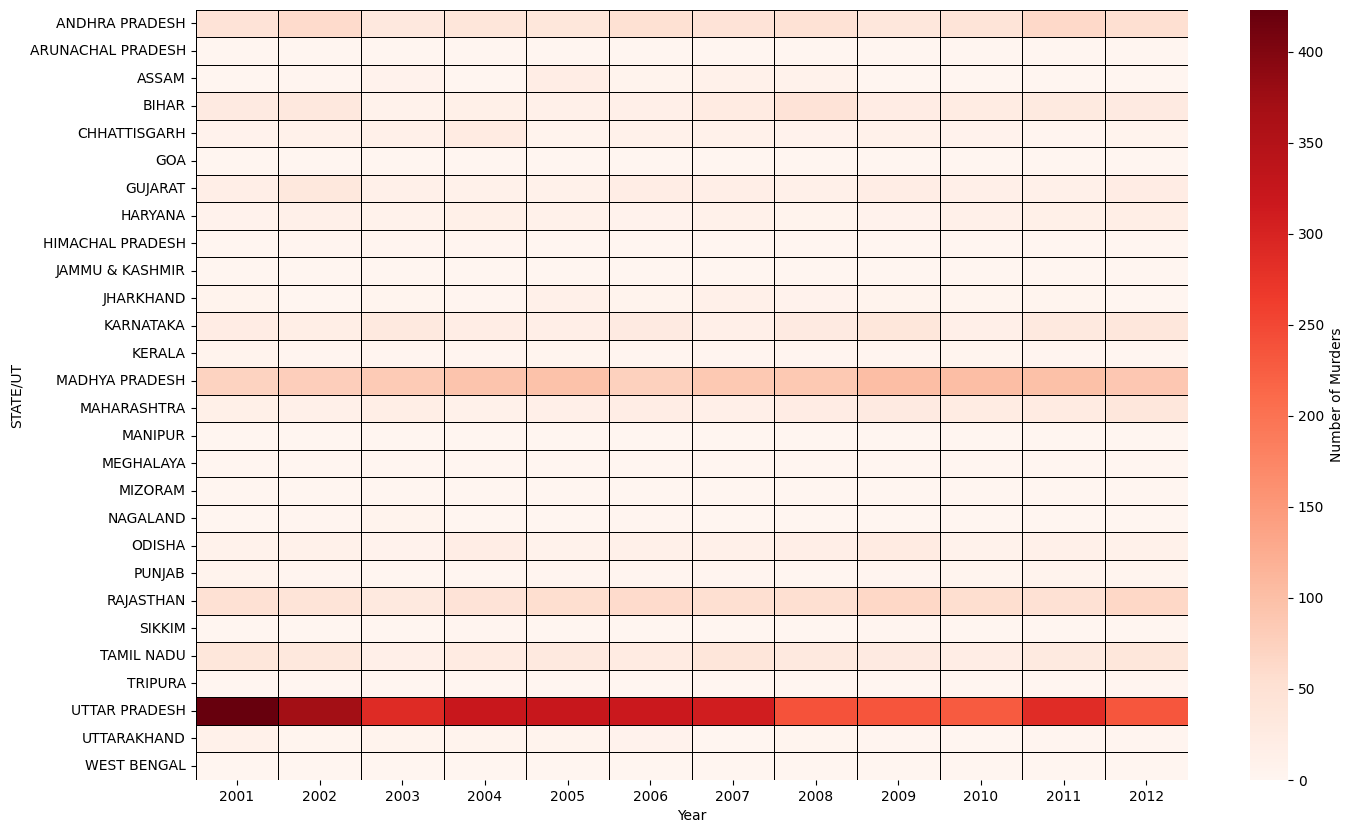

In [23]:
murder_df = df_long[
    (df_long['CRIME HEAD'] == 'MURDER OF SCs') &
    (~df_long['STATE/UT'].str.contains('TOTAL', na=False)) &
    (~df_long['STATE/UT'].isin(['A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY']))
]

# Pivot the data to create a matrix suitable for heatmap
murder_pivot = murder_df.pivot_table(index='STATE/UT', columns='Year', values='Value', fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(murder_pivot, annot=True, fmt='d', cmap='Reds', linewidths=.5, linecolor='black', cbar_kws={'label': 'Number of Murders'})
plt.title('Heatmap of Murder Crimes Against SCs by State and Year (2001-2012)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('State/UT', fontsize=12)
plt.tight_layout()
plt.show()


--- 9. Regional Trend Analysis ---


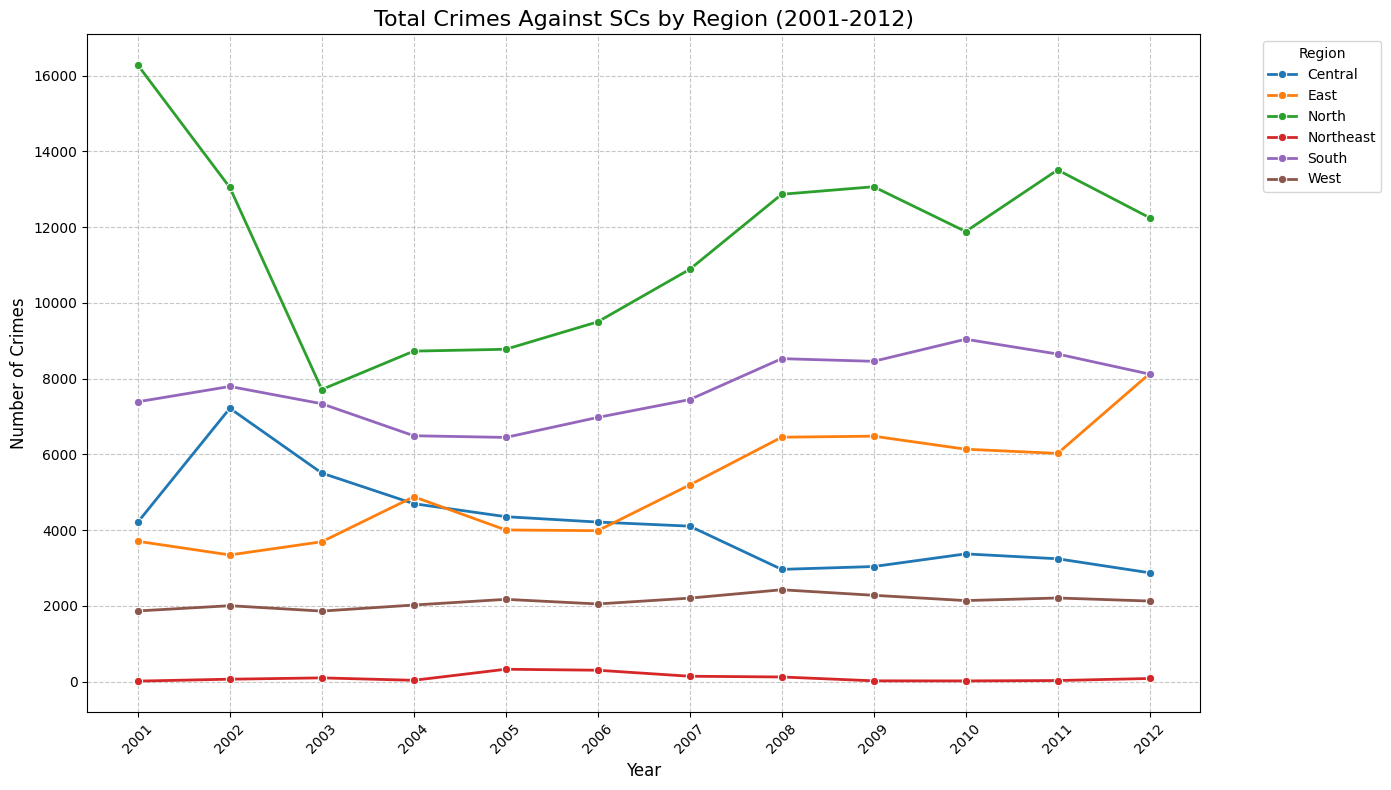

In [24]:
print("\n--- 9. Regional Trend Analysis ---")

# Define regions for states/UTs (This is a simplified mapping and can be refined)
# Note: Some states might fit into multiple regions or have different classifications.
# This mapping is for illustrative purposes.
region_mapping = {
    'ANDHRA PRADESH': 'South', 'KARNATAKA': 'South', 'KERALA': 'South',
    'TAMIL NADU': 'South', 'PUDUCHERRY': 'South',

    'UTTAR PRADESH': 'North', 'RAJASTHAN': 'North', 'HARYANA': 'North',
    'PUNJAB': 'North', 'HIMACHAL PRADESH': 'North', 'UTTARAKHAND': 'North',
    'JAMMU & KASHMIR': 'North', 'DELHI': 'North', 'CHANDIGARH': 'North',

    'BIHAR': 'East', 'JHARKHAND': 'East', 'ODISHA': 'East',
    'WEST BENGAL': 'East', 'CHHATTISGARH': 'East',

    'MADHYA PRADESH': 'Central', 'MAHARASHTRA': 'West', 'GUJARAT': 'West',
    'GOA': 'West', 'D & N HAVELI': 'West', 'DAMAN & DIU': 'West',

    'ASSAM': 'Northeast', 'ARUNACHAL PRADESH': 'Northeast', 'MANIPUR': 'Northeast',
    'MEGHALAYA': 'Northeast', 'MIZORAM': 'Northeast', 'NAGALAND': 'Northeast',
    'SIKKIM': 'Northeast', 'TRIPURA': 'Northeast',

    'A & N ISLANDS': 'Islands', 'LAKSHADWEEP': 'Islands'
}

# Apply region mapping to the states_df (which already excludes 'TOTAL' rows)
states_df_with_regions = states_df.copy()
states_df_with_regions['Region'] = states_df_with_regions['STATE/UT'].map(region_mapping)

# Drop rows where region is NaN (states/UTs not mapped)
states_df_with_regions.dropna(subset=['Region'], inplace=True)

# Group by Region and Year to get total crimes per region per year
regional_trends = states_df_with_regions.groupby(['Region', 'Year'])['Value'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=regional_trends, x='Year', y='Value', hue='Region', marker='o', palette='tab10', linewidth=2)
plt.title('Total Crimes Against SCs by Region (2001-2012)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(regional_trends['Year'].unique(), rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()